In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_enem_2022 = pd.read_csv('enem_2022_v2.csv')

In [3]:
df_enem_2022.head()

,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,...,Q002,Q003,Q004,Q005,Q006,Q008,Q010,Q022,Q024,Q025
0,2022,14,M,2,2,1,1,2,1,0,...,A,A,B,3,B,B,B,A,A,A
1,2022,14,M,2,1,1,1,16,1,0,...,D,E,E,3,Q,E,E,E,E,B
2,2022,5,F,1,2,1,1,2,1,0,...,F,A,D,2,B,B,A,C,A,B
3,2022,6,M,1,3,1,1,2,1,0,...,A,A,B,3,A,C,A,C,B,B
4,2022,4,M,0,3,1,1,1,1,0,...,B,A,B,2,B,B,A,B,A,A


In [4]:
df_enem_2022.columns

Index(['NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'IN_TREINEIRO', 'NO_MUNICIPIO_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q008', 'Q010', 'Q022', 'Q024', 'Q025'],
      dtype='object')

In [5]:
df_enem_2022.rename(columns={
    'NU_ANO': 'ANO', 'TP_FAIXA_ETARIA': 'FAIXA_ETARIA', 'TP_SEXO': 'SEXO', 
    'TP_ESTADO_CIVIL': 'ESTADO_CIVIL', 'SG_UF_ESC': 'UF_ESC', 'TP_PRESENCA_CN': 'PRESENCA_CN',
    'TP_PRESENCA_CH': 'PRESENCA_CH', 'TP_PRESENCA_LC': 'PRESENCA_LC', 'TP_PRESENCA_MT': 'PRESENCA_MT',
    'NU_NOTA_CN': 'NOTA_CN','NU_NOTA_CH': 'NOTA_CH', 'NU_NOTA_LC': 'NOTA_LC', 'NU_NOTA_MT': 'NOTA_MT',
    'NU_NOTA_REDACAO': 'NOTA_REDACAO'
    }, inplace=True)
df_enem_2022.columns

Index(['ANO', 'FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'NO_MUNICIPIO_ESC', 'UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'PRESENCA_CN', 'PRESENCA_CH', 'PRESENCA_LC',
       'PRESENCA_MT', 'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT',
       'TP_STATUS_REDACAO', 'NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q008', 'Q010', 'Q022', 'Q024', 'Q025'],
      dtype='object')

In [14]:
columns = ['FAIXA_ETARIA','SEXO','UF_ESC','PRESENCA_CN', 'PRESENCA_CH', 'PRESENCA_LC',
       'PRESENCA_MT', 'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_REDACAO']
df_enem_2022_filtrado = df_enem_2022[columns]
cod_faixa_etaria = {1:'14-17',2:'17',3:'18',4:'19',5:'20',6:'21',7:'22',8:'23',9:'24',10:'25',
11:'26-30',12:'31-35',13:'36-40',14:'41-45',15:'46-50',16:'51-55',17:'56-60',18:'61-65',19:'66-70',20:'>70'}
df_enem_2022_filtrado['FAIXA_ETARIA'] = df_enem_2022_filtrado['FAIXA_ETARIA'].map(cod_faixa_etaria)
df_enem_2022_filtrado

/tmp/ipykernel_5082/2453047612.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enem_2022_filtrado['FAIXA_ETARIA'] = df_enem_2022_filtrado['FAIXA_ETARIA'].map(cod_faixa_etaria)


,FAIXA_ETARIA,SEXO,UF_ESC,PRESENCA_CN,PRESENCA_CH,PRESENCA_LC,PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO
0,41-45,M,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,41-45,M,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2,20,F,NaN,1,1,1,1,421.1,546.0,498.8,565.3,760.0
3,21,M,NaN,1,1,1,1,490.7,388.6,357.8,416.0,320.0
4,19,M,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3476100,18,M,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3476101,41-45,F,PE,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3476102,17,M,SC,1,1,1,1,527.9,627.0,583.3,637.1,660.0
3476103,18,M,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN


In [15]:
grupo_faixa_etaria = df_enem_2022_filtrado.groupby('FAIXA_ETARIA')['NOTA_REDACAO'].mean()
grupo_faixa_etaria

FAIXA_ETARIA
14-17    641.826336
17       638.074090
18       622.497402
19       622.182704
20       623.864441
21       623.769297
22       619.006633
23       608.832076
24       597.879268
25       587.683955
26-30    569.283824
31-35    543.313598
36-40    514.545016
41-45    492.684168
46-50    480.226998
51-55    476.102339
56-60    465.710119
61-65    446.026044
66-70    433.021182
>70      408.352941
Name: NOTA_REDACAO, dtype: float64

Text(0.5, 1.0, 'Média das notas da redação por faixa etária')

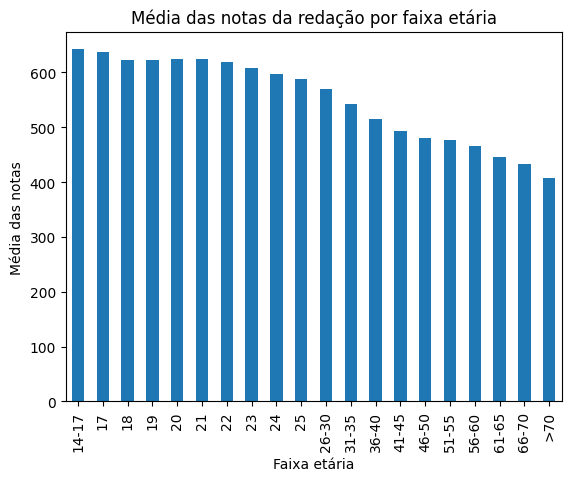

In [16]:
grupo_faixa_etaria.plot(kind='bar')
plt.xlabel('Faixa etária')
plt.ylabel('Média das notas')
plt.title('Média das notas da redação por faixa etária')

In [17]:
grupo_estado = df_enem_2022_filtrado.groupby('UF_ESC')['NOTA_REDACAO'].mean()
grupo_estado

UF_ESC
AC    593.836127
AL    609.239389
AM    521.846835
AP    582.108355
BA    628.588676
CE    541.267488
DF    646.072515
ES    652.802875
GO    613.622994
MA    587.937786
MG    674.544022
MS    614.975884
MT    601.798085
PA    610.247442
PB    637.171435
PE    615.068036
PI    640.137921
PR    617.369006
RJ    655.652574
RN    652.192108
RO    587.738221
RR    569.231788
RS    643.409557
SC    639.478886
SE    639.220094
SP    640.755409
TO    590.537198
Name: NOTA_REDACAO, dtype: float64

Text(0.5, 1.0, 'Média das notas da redação por estado')

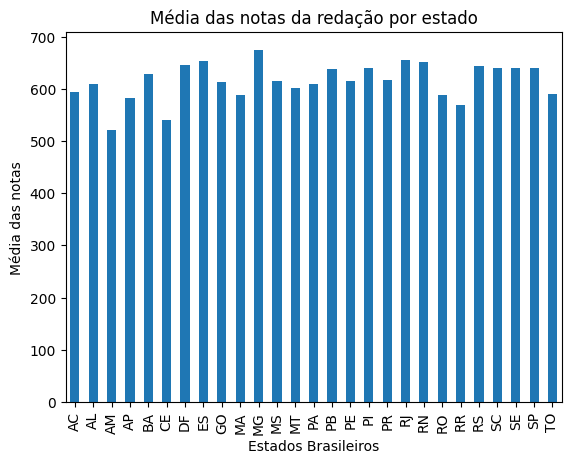

In [18]:
grupo_estado.plot(kind='bar')
plt.xlabel('Estados Brasileiros')
plt.ylabel('Média das notas')
plt.title('Média das notas da redação por estado')